In [1]:
import keras
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.
C:\Users\kmkar\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kmkar\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kmkar\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kmkar\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Loading the MNIST Dataset

In [2]:
(Xtrain , ytrain) , (Xtest , ytest) = mnist.load_data()

#### Reshaping and Normalizing training data

In [3]:
Xtrain = Xtrain.reshape(Xtrain.shape[0] , 28,28,1)
Xtest = Xtest.reshape(Xtest.shape[0] , 28,28,1)

In [4]:
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0

### Split the training set into training and validation sets

In [5]:
Xvalidate = Xtrain[0:10000,:]
Xtrain = Xtrain[10000:60000,:]

yvalidate = ytrain[0:10000]
ytrain = ytrain[10000:60000]

#### One-hot encoding labels

In [6]:
ytrain = keras.utils.to_categorical(ytrain)
yvalidate = keras.utils.to_categorical(yvalidate)

### CNN Model

In [7]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout

In [8]:
model = Sequential()
input_shape = (28,28,1)

model.add(Conv2D(32 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = input_shape))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Conv2D(32 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(100 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation = 'softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
________________________________________________

### Compiling and Fitting the model

#### Optimizer = Adam
#### Loss Metric = categorical_crossentropy

In [9]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
history = model.fit(Xtrain ,ytrain,batch_size = 100 , epochs = 10 ,validation_data=(Xvalidate, yvalidate) , verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.4083 - accuracy: 0.8721 - val_loss: 0.0955 - val_accuracy: 0.9747
Epoch 2/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.1315 - accuracy: 0.9612 - val_loss: 0.0764 - val_accuracy: 0.9775
Epoch 3/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.1009 - accuracy: 0.9707 - val_loss: 0.0579 - val_accuracy: 0.9834
Epoch 4/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0835 - accuracy: 0.9753 - val_loss: 0.0491 - val_accuracy: 0.9860
Epoch 5/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0689 - accuracy: 0.9793 - val_loss: 0.0446 - val_accuracy: 0.9864
Epoch 6/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.0434 - val_accuracy: 0.9881
Epoch 7/10
50000/500

### Plotting the Accuracy and Losses for training and test sets

In [11]:
import matplotlib.pyplot as plt

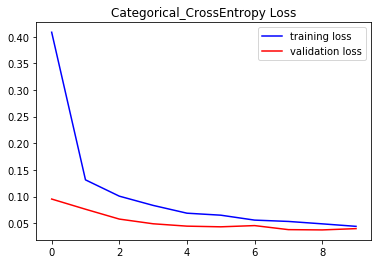

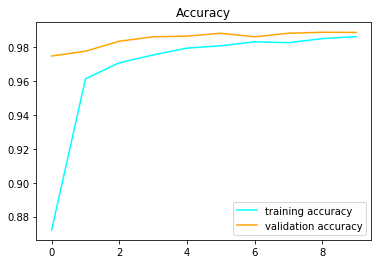

In [21]:
plt.title("Categorical_CrossEntropy Loss")
plt.plot(history.history['loss'] , color = 'blue' , label = 'training loss')
plt.plot(history.history['val_loss'] , color = 'red' , label = 'validation loss')
plt.legend()
plt.show()

plt.title("Accuracy")
plt.plot(history.history['accuracy'] , color = 'cyan' , label = 'training accuracy')
plt.plot(history.history['val_accuracy'] , color = 'orange' , label = 'validation accuracy')
plt.legend()
plt.show()

### Predicting test data

In [13]:
y_predict = np.argmax(model.predict(Xtest) , axis = 1)

In [14]:
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
accuracy = np.mean((y_predict==ytest))
print("Test accuracy = " , accuracy*100 , "%")

Test accuracy =  99.08 %


### User Input data

In [16]:
def user_input(path):
    img = keras.preprocessing.image.load_img(path, color_mode="grayscale" , target_size=(28,28) ,interpolation='nearest')
    X = keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
    X = X.reshape(-1, 28,28,1)
    return X

In [17]:
import numpy as np
path = 'F:/input.jpg'
X = user_input(path)
yhat = model.predict(X)

predicted = np.argmax(yhat)

### Saving the model and weights

In [18]:
from keras.models import model_from_json

In [19]:
model_json = model.to_json()
with open("MNIST_keras_model.json", "w") as json_file:
    json_file.write(model_json)

In [20]:
model.save_weights('MNIST_keras_weights.h5')